In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
np.random.seed(42)
n = 4000

#1 My predictors
exposure = np.random.uniform(0,10,n)
mask_use = np.random.uniform(0,100,n)

In [3]:
#2 Rule
y = ((exposure>5) & (mask_use<50)).astype(int)

In [4]:
#3) Add noise and flip 8% of the labels
flip = np.random.choice(n, int(0.08*n), replace=False)
y[flip] = 1 - y[flip]
exposure = exposure + np.random.normal(0,0.5,n)
mask_use = mask_use + np.random.normal(0,5,n)

In [5]:
df = pd.DataFrame({"exposure_hours":exposure,"mask_use":mask_use,"high_risk":y})

In [10]:
X = df[["exposure_hours","mask_use"]] 
y = df["high_risk"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train,y_train)
print("train acc:",accuracy_score(y_train,clf.predict(X_train)))
print("test acc :",accuracy_score(y_test,clf.predict(X_test)))
print("confusion:\n",confusion_matrix(y_test,clf.predict(X_test)))

train acc: 1.0
test acc : 0.7933333333333333
confusion:
 [[717 119]
 [129 235]]


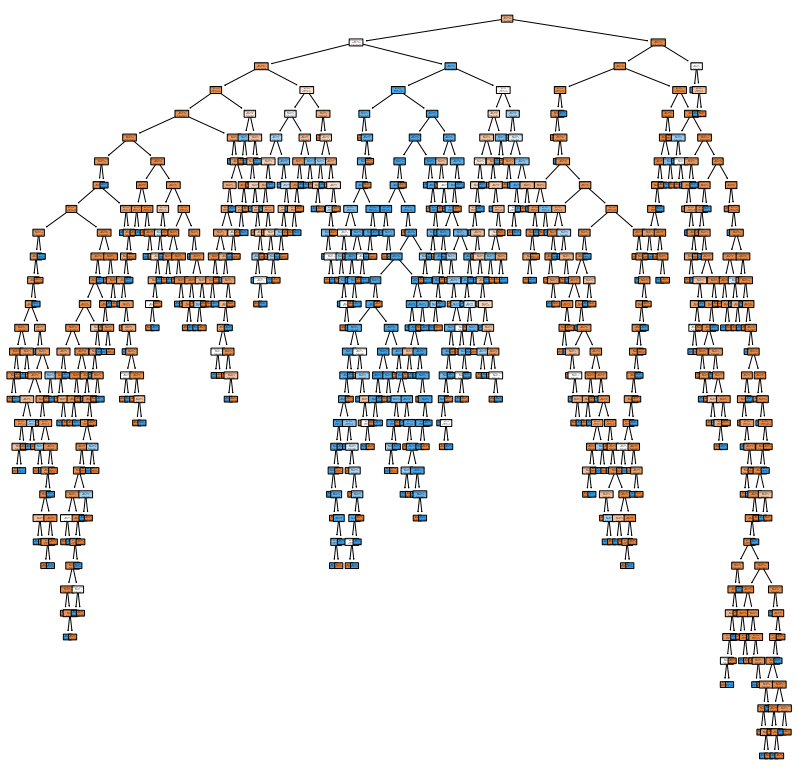

In [15]:
plt.figure(figsize=(14,14))
plot_tree(clf,feature_names=["exposure hours","mask use"],
          class_names=["low","high"], filled=True,rounded=True)
plt.show()

/Users/yelebedesta/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


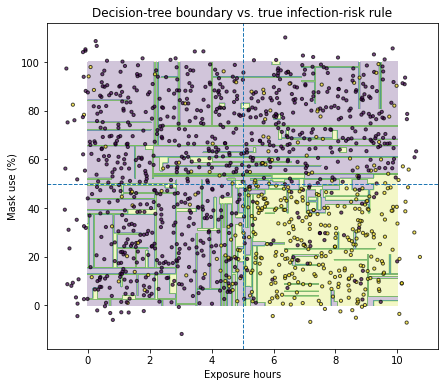

In [16]:
xx,yy = np.meshgrid(np.linspace(0,10,400), np.linspace(0,100,400))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(7,6))
plt.contourf(xx,yy,Z,alpha=0.25)
plt.scatter(X_te["exposure_hours"],X_te["mask_use"],c=y_te,s=10,edgecolor="k",alpha=0.7)
plt.axvline(5,ls="--",lw=1); plt.axhline(50,ls="--",lw=1)
plt.xlabel("Exposure hours"); plt.ylabel("Mask use (%)")
plt.title("Decision-tree boundary vs. true infection-risk rule")
plt.show()